# K-Means clustering used for image compression

In the following we discuss a curious application of K-Means clustering to image compression.

In this notebook [this notebook](https://github.com/andreaspts/ML_KMeans_Clustering_Analyses/blob/master/simpleKmeansclusterungoncardata.ipynb), we introduced this particular algorithm and exemplified it's power on a simple example. For a reminder on K-Means clustering, we refer to https://en.wikipedia.org/wiki/K-means_clustering. 

In a first step, we have to load the image we would like to compress. We remind ourselves that the information encoding the image is in fact represented by an array. We then play around with this structure to gain some intuition about the dimensions of this array. We then reshape it to bring it into the appropriate form needed for the K-Means processing. 

In a second step, we feed it into the KMeans function and demand that the image information given in terms of numbers in the (now reshaped) array is clustered into 20 clusters. The idea is that e.g. reddish colors represented by a range of numbers are clustered around a mean color value. This is done for 20 color groups. 

We report these 20 cluster centers and the cluster labels, where the latter tells us which pixel belongs to which of the 20 clusters.

Then these labels per pixel are associated to the cluster centers to regain the now compressed image/array which is subsequently reshaped.

Finally, the image is printed and saved.

In [161]:
#import necessary packages
from skimage import io, exposure
import imageio

import numpy as np

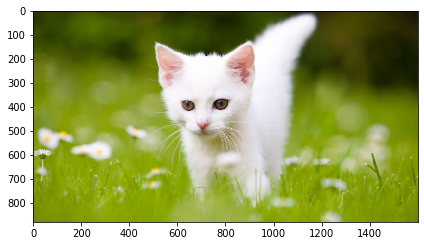

In [162]:
#load image
image = io.imread("./cat2.jpg")
io.imshow(image)

In [163]:
#retrieve dimensional info of the image/array
image.shape

(878, 1600, 3)

In [136]:
#would like to drop the transparency values (alpha channel in png files) if available
#image[:, :, [0, 1, 2]]
image[:, :, [0, 1, 2]].shape

(878, 1600, 3)

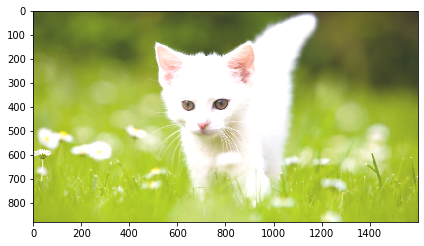

In [147]:
#some basic image manipulations to get an intuition for the dimensions
#render picutre brighter
image_without_alpha = image[:, :, :3]
image_brighter = image_without_alpha + 40

image_brighter[image_brighter < image_without_alpha] = 255

io.imshow(image_brighter)

In [138]:
#dimensions without alpha channel
image_without_alpha.shape

(878, 1600, 3)

In [148]:
#bring image array into different form needed for KMeans algorithm
image_reshaped = image_without_alpha.reshape(-1,3)
image_without_alpha.reshape(-1,3).shape

(1404800, 3)

In [141]:
#use KMeans clustering to reduce colors of an image to 20
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 20, n_init = 1) #20 clusters only @ 1 attempt
model.fit(image_reshaped)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [142]:
#print center points of the 20 clusters
print(model.cluster_centers_)

#print cluster label per pixel
print(model.labels_)

[[146.64594349 167.20732299  57.15626361]
 [ 30.51872621  35.23489607   2.23298507]
 [231.19346774 228.16940306 232.82590389]
 [135.92728564 161.94373939   2.99916919]
 [ 76.98805547  93.74109583   2.77371914]
 [171.0403139  182.09228508 115.51946331]
 [203.08235064 197.93607598 184.20594774]
 [103.28797254 121.73471652   8.29119651]
 [124.47377921 143.28898786  36.87343784]
 [ 45.6698783   56.05852341   2.29698431]
 [140.48041754 163.23962655  29.39857355]
 [158.90450051 175.95268363  81.15284909]
 [122.67918743 146.58430249   2.71650093]
 [183.73556366 187.14767773 152.27506896]
 [217.51172994 163.34571991 149.39192335]
 [247.6917005  246.32038    250.14206924]
 [ 91.68169972  92.15240793  64.19512748]
 [149.22344573 134.45605636 106.42131181]
 [217.1282421  212.22700308 210.58043103]
 [ 61.27337462  72.19534988   3.61826125]]
[9 9 9 ... 7 7 7]


In [154]:
#length of the cluster labels equals (of course) that dimension of the array storing the image info
len(model.labels_)

1404800

In [143]:
#associate pixel labels to cluster centers: "giving restored image" 
colors = model.cluster_centers_.astype("uint8") #to convert centers values into integers representing true image information
pixels = model.labels_

#save restored image
np.savez_compressed("./image.npz", pixels = pixels, colors = colors)

with np.load("./image.npz") as file:
    pixels = file["pixels"]
    colors = file["colors"]

    
pixels_transformed = []

for pixel in pixels:
    pixels_transformed.append(colors[pixel])

In [144]:
#transform back into np array
pixels_transformed = np.array(pixels_transformed)
pixels_transformed.shape

(1404800, 3)

In [145]:
#reshaping in order to show the compressed image
image_restored = pixels_transformed.reshape(878, 1600, 3)

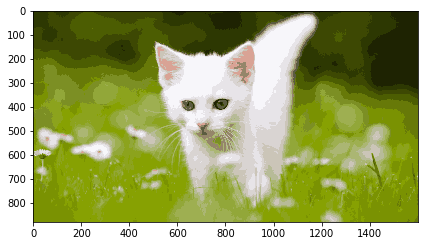

In [146]:
io.imshow(image_restored)

In [159]:
#saving compressed (array as an) image
imageio.imwrite('cat2_transformed.jpg', image_restored)

Comparing the sizes of the images before the downsizing through KMeans and after, we see that with the compression to 20 colors the size of the image is less than a fourth after the processing.